# Taller 1 - Analítica computacional para la Toma de Decisione
## Esteban Ladino 

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy as sp # type: ignore

### BikePrices

In [2]:
df = pd.read_csv(".\\BikePrices.csv")
print(f"Dimensiones: {df.shape} \nCantidad de NaN: {df.isnull().sum().sum()}")
print(f"\tCantidad de NaN por columna: {list(df.isnull().sum())}")
df.head() 

Dimensiones: (1061, 8) 
Cantidad de NaN: 435
	Cantidad de NaN por columna: [0, 0, 0, 0, 0, 0, 0, 435]


,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [3]:
columnas_interes = ["Brand", "Model", "Seller_Type", "Owner"]
for columna in columnas_interes:
    print(f"Valores únicos en {columna}: {list(df[columna].unique())}")
# df["Owner"] = df["Owner"].map({"1st owner": 1, "2nd owner": 2, "3rd owner": 3, "4th owner": 4})

Valores únicos en Brand: ['TVS', 'Bajaj', 'Yo', 'Honda', 'Mahindra', 'Hero', 'Yamaha', 'Suzuki', 'Activa', 'Vespa', 'Royal', 'Benelli', 'KTM', 'UM', 'Kawasaki', 'Hyosung', 'BMW', 'Harley', 'Jawa', 'Aprilia']
Valores únicos en Model: ['TVS XL 100', 'Bajaj  ct 100', 'Yo Style', 'Bajaj Discover 100', 'TVS Scooty Streak', 'Honda Navi [2016-2017]', 'Mahindra Flyte', 'Bajaj Discover 100 M', 'Hero Splendor NXG', 'TVS Star City', 'Hero Pleasure [2005-2015]', 'Bajaj Discover 100 T', 'Bajaj Discover 125 M', 'Honda Navi', 'Mahindra Rodeo', 'Hero Splender Plus', 'Honda CB Twister', 'Honda Dream Neo', 'Hero Maestro', 'Yamaha Saluto RX', 'Hero Pleasure', 'Hero Splendor PRO', "Suzuki Let''s", 'Honda Activa [2000-2015]', 'Hero Duet', 'Honda Activa 4G', 'Activa 4g', 'Hero Honda Passion Pro', 'Honda CB twister', 'Honda Activa i [2016-2017]', 'Mahindra Gusto', 'Suzuki Swish [2012-2015]', 'TVS Sport ', 'TVS Jupyter', 'TVS Wego', 'Activa 3g', 'Hero Splendor iSmart', 'TVS Scooty Zest 110', 'Bajaj Discover 1

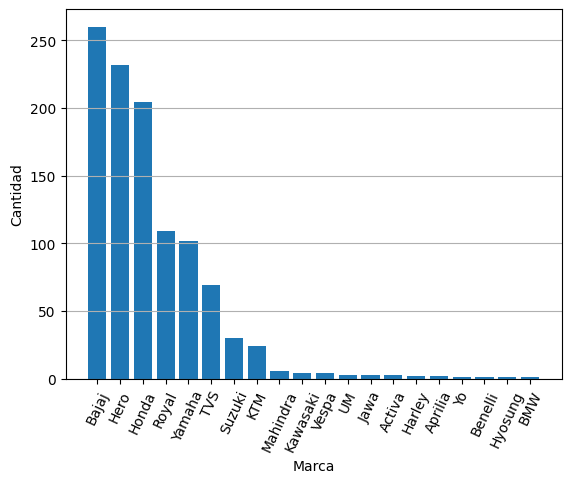

In [4]:
Conteo_Brands = df["Brand"].value_counts()
plt.bar(Conteo_Brands.index, Conteo_Brands.values)
plt.xlabel("Marca")
plt.ylabel("Cantidad")
plt.xticks(rotation=65) 
plt.grid(axis="y")
plt.show()


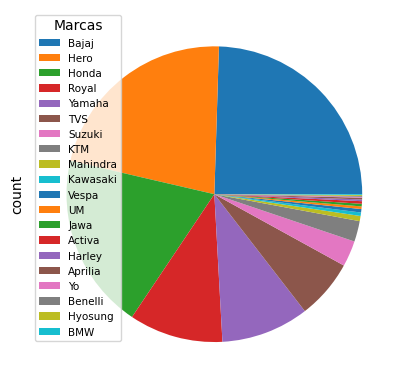

In [5]:
#plt.figure(figsize=(10, 8))

Conteo_Brands.plot(kind="pie", labels=[""]*20, title="") #, autopct='%1.1f%%') 
plt.legend(title="Marcas", loc="best", labels=Conteo_Brands.index, fontsize=7.5) 
plt.show()

In [6]:
df.groupby("Brand")["Owner"].unique()
df.groupby("Brand")["Owner"].value_counts()

Brand     Owner    
Activa    1st owner      3
Aprilia   1st owner      2
BMW       1st owner      1
Bajaj     1st owner    224
          2nd owner     35
          3rd owner      1
Benelli   1st owner      1
Harley    2nd owner      1
          4th owner      1
Hero      1st owner    193
          2nd owner     34
          3rd owner      4
          4th owner      1
Honda     1st owner    190
          2nd owner     14
Hyosung   2nd owner      1
Jawa      1st owner      3
KTM       1st owner     22
          2nd owner      2
Kawasaki  1st owner      2
          2nd owner      2
Mahindra  1st owner      4
          2nd owner      1
          3rd owner      1
Royal     1st owner     93
          2nd owner     14
          3rd owner      2
Suzuki    1st owner     29
          2nd owner      1
TVS       1st owner     61
          2nd owner      7
          4th owner      1
UM        1st owner      2
          2nd owner      1
Vespa     1st owner      3
          2nd owner      1
Yamaha  

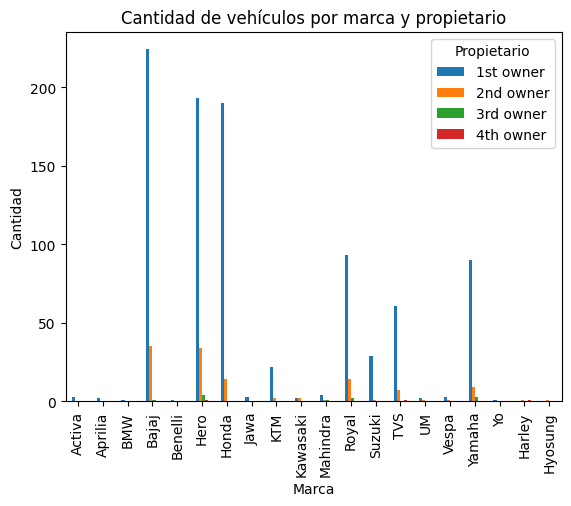

In [7]:
owners = ["1st owner", "2nd owner", "3rd owner", "4th owner"]
valores = []
for o in owners:
    df[df["Owner"] == o].groupby("Brand").size()
    valores.append(df[df["Owner"] == o].groupby("Brand").size())

df_resultados = pd.DataFrame(valores, index=owners)

df_resultados.T.plot(kind="bar")
plt.title("Cantidad de vehículos por marca y propietario")
plt.xlabel("Marca")
plt.ylabel("Cantidad")
plt.legend(title="Propietario")



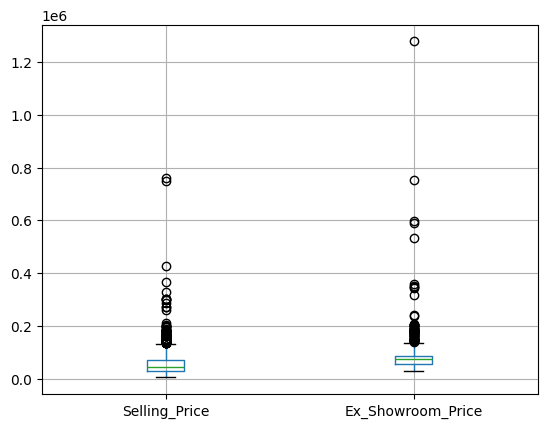

In [8]:
df.boxplot(column=["Selling_Price", "Ex_Showroom_Price"])
plt.show()

### Números aleatorios y bondad de ajuste

In [9]:
import statsmodels.api as sm # type: ignore
import scipy.stats as stats # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy as sp# type: ignore

In [10]:
left = 2
right = 25
mode = 10

Numeros = np.random.triangular(left=left, mode=mode, right=right, size=1000)
df = pd.DataFrame(Numeros)
Descrip = df.describe() 
print(Descrip)

                 0
count  1000.000000
mean     12.494756
std       4.705928
min       2.050089
25%       9.053050
50%      11.870516
75%      15.832723
max      24.642092


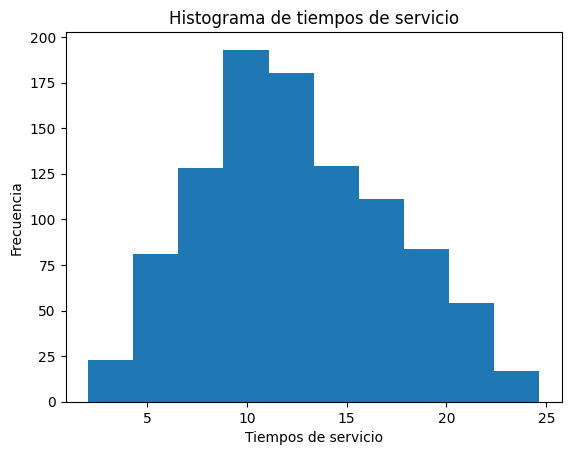

In [11]:
plt.hist(x=Numeros)
#plt.grid(True)
plt.title('Histograma de tiempos de servicio')
plt.xlabel('Tiempos de servicio')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
Minim = Descrip.loc["min"][0]
Maxim = Descrip.loc["max"][0]
Modam = df.mode(axis="columns").iloc[0][0]

x = np.linspace(Minim, Maxim, 1000) 
print(Minim, Modam, Maxim)


2.0500892768621073 10.926011533878071 24.642092219161892


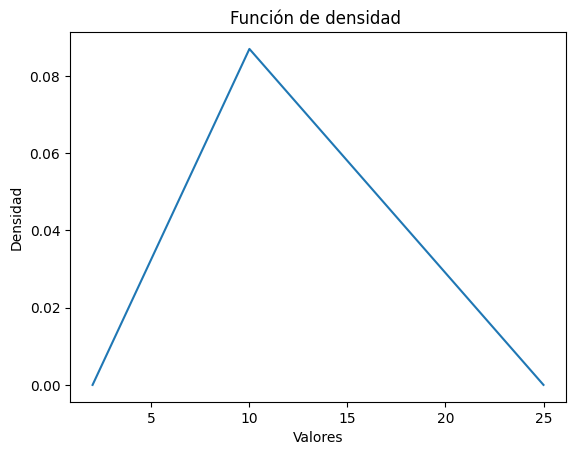

In [13]:
from scipy.stats import triang # type: ignore
Minim = Descrip.loc["min"][0]
Maxim = Descrip.loc["max"][0]
x = np.arange(left,right,0.001)

c = (mode - left) / (right - left)  
loc = left                         
scale = right - left               

plt.plot(x, triang.pdf(x, c, loc=loc, scale=scale), label="PDF")
plt.title('Función de densidad ')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

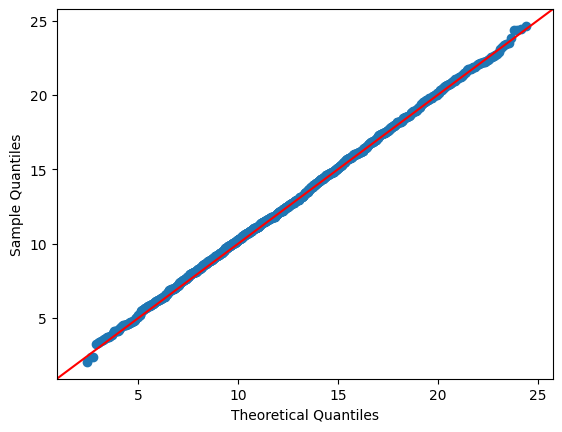

In [18]:
sm.qqplot(Numeros, dist=stats.triang(c, loc=loc, scale=scale), line="45")
plt.show()

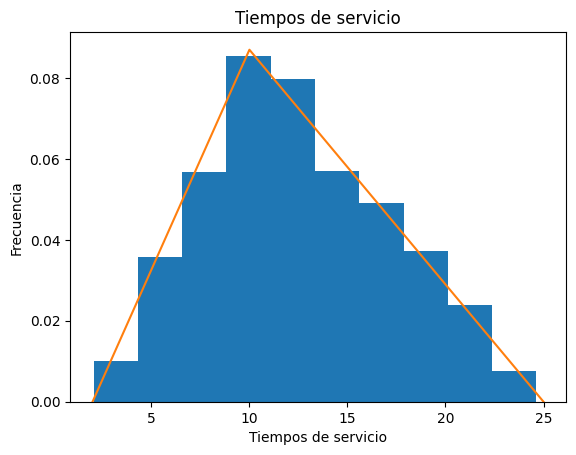

In [15]:

plt.hist(x=Numeros, density=True)
plt.plot(x, triang.pdf(x, c, loc=loc, scale=scale), label="PDF")
plt.title('Tiempos de servicio')
plt.xlabel('Tiempos de servicio')
plt.ylabel('Frecuencia')
plt.show()